In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mineração de dados/datatran2022.csv', sep=';', encoding='latin1')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,405151,2022-01-01,sábado,01:35:00,PI,316.0,415,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,1,0,1,2,"-7,43280012","-40,68261908",SPRF-PI,DEL04-PI,UOP03-DEL04-PI
1,405158,2022-01-01,sábado,02:40:00,PR,116.0,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,0,0,1,1,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
2,405172,2022-01-01,sábado,05:22:00,MS,163.0,393,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,1,0,1,2,"-21,228445","-54,456296",SPRF-MS,DEL02-MS,UOP01-DEL02-MS
3,405203,2022-01-01,sábado,07:00:00,RJ,101.0,457,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,...,1,1,0,1,2,"-23,03149804","-44,17715297",SPRF-RJ,DEL03-RJ,UOP02-DEL03-RJ
4,405207,2022-01-01,sábado,09:00:00,MG,40.0,"508,3",RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,...,0,3,0,0,1,"-19,76061249","-44,1347544",SPRF-MG,DEL02-MG,UOP01-DEL02-MG


In [ ]:
df.drop_duplicates(keep=False, inplace=True)

In [ ]:
df.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        197
km                        197
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    3
delegacia                 759
uop                        48
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64547 entries, 0 to 64546
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_inversa            64547 non-null  object 
 1   dia_semana              64547 non-null  object 
 2   horario                 64547 non-null  object 
 3   uf                      64547 non-null  object 
 4   br                      64547 non-null  float64
 5   km                      64350 non-null  object 
 6   municipio               64547 non-null  object 
 7   causa_acidente          64547 non-null  object 
 8   tipo_acidente           64547 non-null  object 
 9   classificacao_acidente  64547 non-null  object 
 10  fase_dia                64547 non-null  object 
 11  sentido_via             64547 non-null  object 
 12  condicao_metereologica  64547 non-null  object 
 13  tipo_pista              64547 non-null  object 
 14  tracado_via             64547 non-null

In [ ]:
df['br'].fillna(0, inplace=True)

In [ ]:
df.drop(['delegacia'], axis=1, inplace=True)

<ipython-input-16-fa3abbe13bde>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


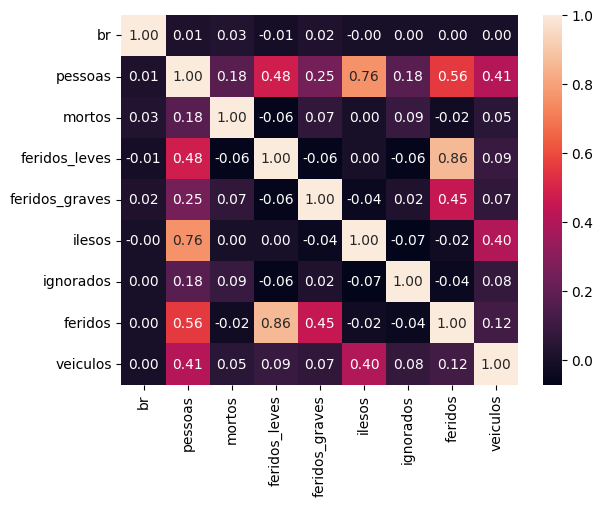

In [ ]:
correlation_matrix = df.corr()
num_decimals = 2

correlation_matrix_formatted = correlation_matrix.apply(lambda x: round(x, num_decimals))

fig = sns.heatmap(correlation_matrix_formatted, annot=True, fmt=f'.{num_decimals}f')
plt.show()

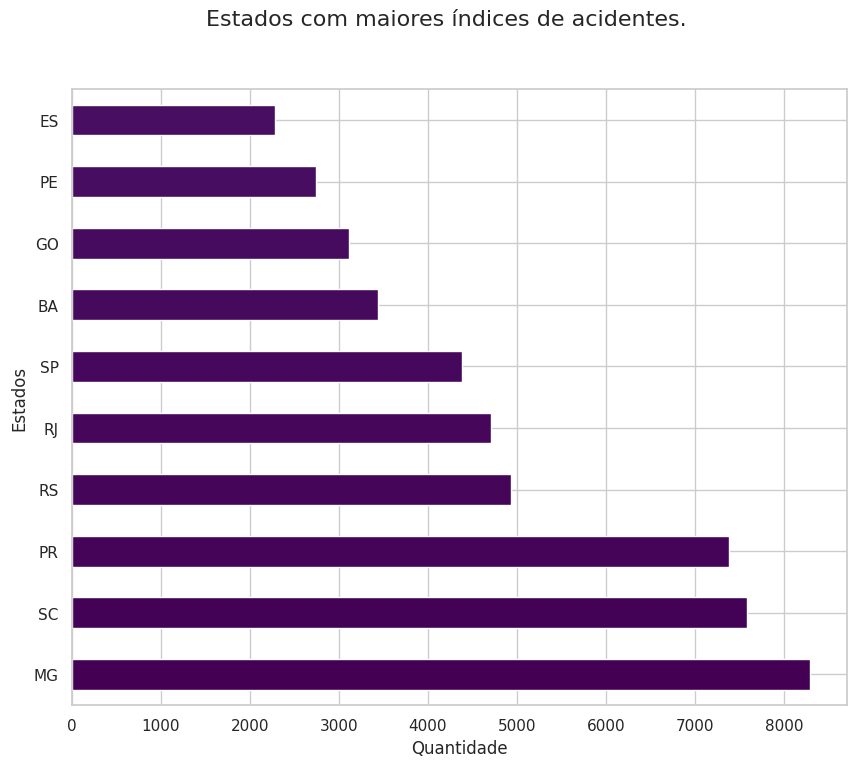

In [ ]:
import matplotlib.pyplot as plt

# Exemplo de dados (substitua 'df' pelo seu DataFrame)
data = df['uf']

# Crie um gráfico de barras horizontais com a paleta de cores 'viridis'
fig = plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(range(10))  # Aqui, range(10) define 10 cores da paleta 'viridis'
data.value_counts().head(10).plot.barh(color=colors)
fig.suptitle("Estados com maiores índices de acidentes.", fontsize=16)
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Estados', fontsize=12)
plt.show()


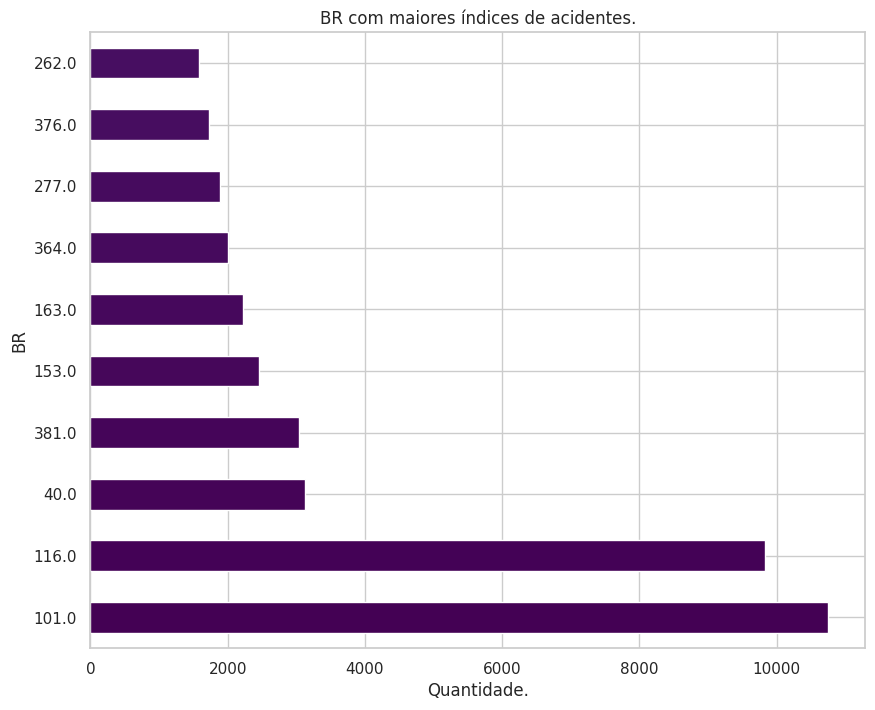

In [ ]:
fig = plt.figure(figsize=(10,8))
colors = plt.cm.viridis(range(10))
fig = df['br'].value_counts().head(10).plot.barh(color=colors)
fig.set_title("BR com maiores índices de acidentes.")
fig.set_xlabel('Quantidade.')
fig.set_ylabel('BR')
plt.show()

In [ ]:
tipo_de_acidente= df.groupby('tipo_acidente')[['mortos']].count().sort_values(by='mortos',ascending= False).head(20)
tipo_de_acidente.reset_index(inplace=True)

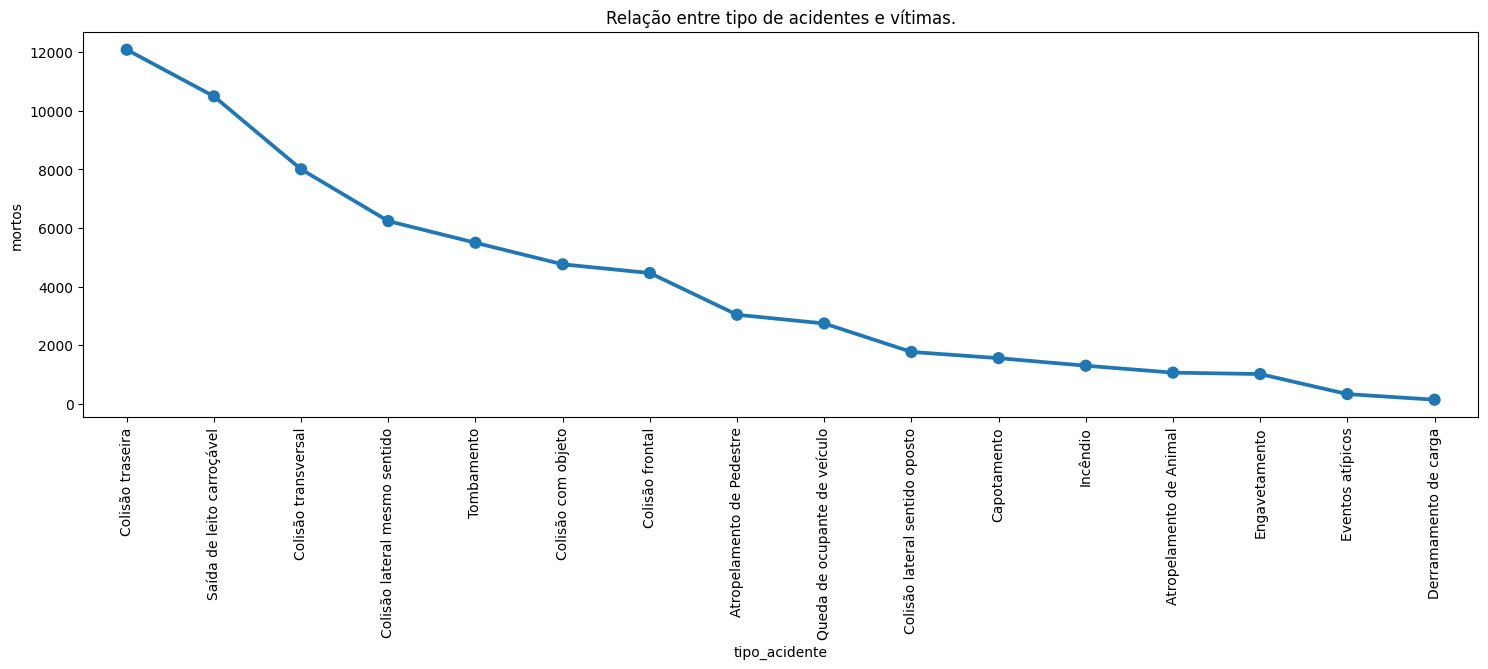

In [ ]:
plt.figure(figsize=(18,5))
sns.pointplot(x='tipo_acidente', y='mortos',data=tipo_de_acidente)
plt.xticks(rotation=90)
plt.title('Relação entre tipo de acidentes e vítimas.')
plt.show()

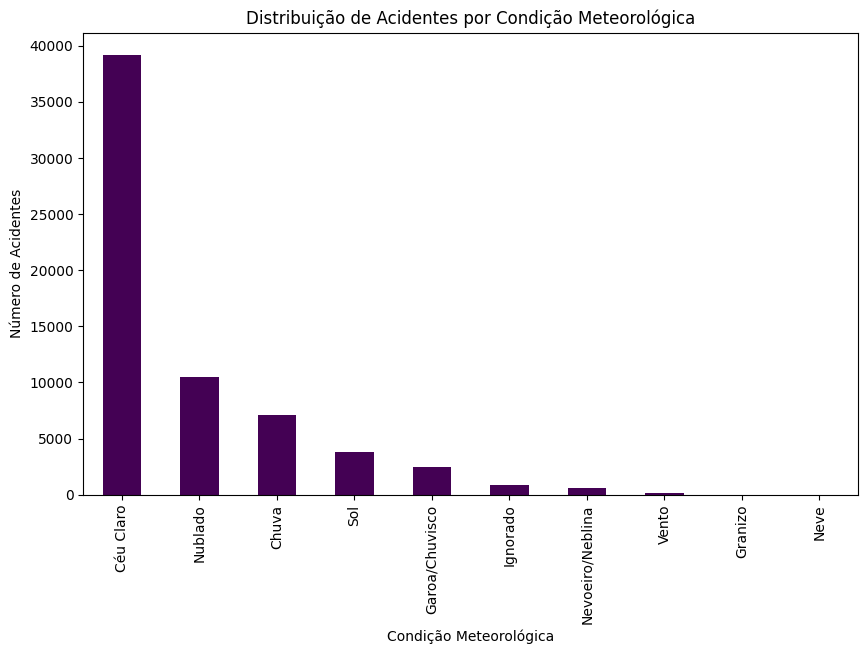

In [ ]:
import matplotlib.pyplot as plt
data = df['condicao_metereologica']
count_by_condition = data.value_counts()

plt.figure(figsize=(10, 6))
count_by_condition.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Condição Meteorológica')
plt.ylabel('Número de Acidentes')
plt.title('Distribuição de Acidentes por Condição Meteorológica')
plt.xticks(rotation=90)  # Rotaciona os rótulos para melhor legibilidade
plt.show()

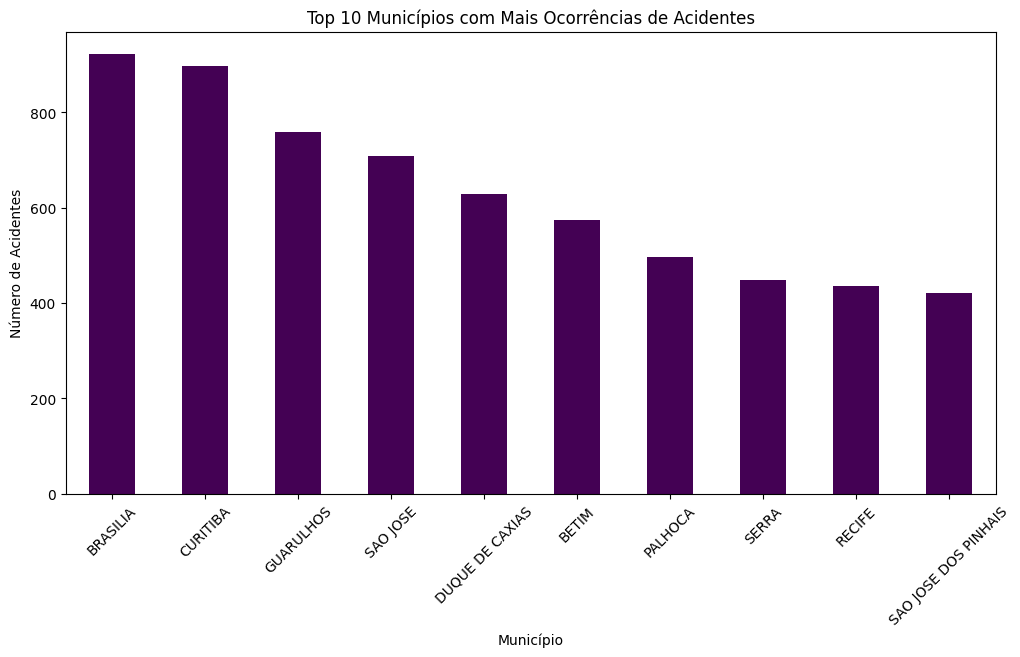

In [ ]:
import matplotlib.pyplot as plt

# Exemplo de dados (substitua 'df' pelo seu DataFrame)
# Supondo que 'municipio' contém os nomes dos municípios
data = df['municipio']

# Conte a ocorrência de acidentes por município
count_by_municipio = data.value_counts()

# Escolha quantos municípios principais você deseja exibir no gráfico
top_municipios = count_by_municipio.head(10)  # Exibirei os 10 principais municípios

# Crie um gráfico de barras para os 10 principais municípios
plt.figure(figsize=(12, 6))
top_municipios.plot(kind='bar', colormap='viridis')
plt.xlabel('Município')
plt.ylabel('Número de Acidentes')
plt.title('Top 10 Municípios com Mais Ocorrências de Acidentes')
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor legibilidade
plt.show()
